In [26]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point,Polygon
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [63]:
bglr=pd.read_csv('DISTANCE CAL UBER.csv')
bglr.head()

,sourceid,Longitude,Latitude,dstid,Long2,Lat2,DISTANCE2,mean_tt,tt_in_mins,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,stand_tt,geom_tt,st_geo_tt
0,88,77.592294,13.097196,33,77.580023,13.108276,1.126059,2022.22,33.703667,665.53,1944.10,1.31,11.092167,32.401667,0.021833
1,163,77.590945,13.098422,16,77.579874,13.086915,1.089601,3159.21,52.653500,680.03,3095.19,1.22,11.333833,51.586500,0.020333
2,160,77.589080,13.100057,46,77.595099,13.107210,0.639010,3943.34,65.722333,581.21,3900.20,1.16,9.686833,65.003333,0.019333
3,162,77.587331,13.101375,26,77.587944,13.123785,1.548969,3193.64,53.227333,615.47,3143.88,1.19,10.257833,52.398000,0.019833
4,84,77.587120,13.101557,73,77.754124,13.009115,12.928686,801.05,13.350833,324.42,766.42,1.31,5.407000,12.773667,0.021833


In [25]:
bglr.tail()

,Longitude,Latitude,Long2,Lat2,DISTANCE2,tt_in_mins,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,stand_tt,geom_tt,st_geo_tt
851958,NaN,NaN,77.586291,NaN,5360.754510,75.538833,652.37,4488.16,1.15,10.872833,74.802667,0.019167
851959,NaN,NaN,77.565027,NaN,5359.285293,22.833333,693.47,1204.12,1.66,11.557833,20.068667,0.027667
851960,NaN,NaN,77.572257,NaN,5359.784850,46.552500,558.44,2743.98,1.20,9.307333,45.733000,0.020000
851961,NaN,NaN,77.572638,NaN,5359.811147,45.361000,474.52,2684.04,1.18,7.908667,44.734000,0.019667
851962,NaN,NaN,77.580023,NaN,5360.321421,49.097333,841.71,2820.82,1.35,14.028500,47.013667,0.022500


In [7]:
bglr.columns

Index(['sourceid', 'Longitude', 'Latitude', 'dstid', 'Long2', 'Lat2',
       'DISTANCE2', 'mean_tt', 'tt_in_mins', 'standard_deviation_travel_time',
       'geometric_mean_travel_time',
       'geometric_standard_deviation_travel_time', 'stand_tt', 'geom_tt',
       'st_geo_tt'],
      dtype='object')

In [64]:
bglr.drop('sourceid', axis=1, inplace=True)
bglr.drop('dstid', axis=1, inplace=True)
bglr.drop('mean_tt', axis=1, inplace=True)

In [38]:
bglr.isna().sum()

Longitude                                   810901
Latitude                                    810901
Long2                                            0
Lat2                                        749563
DISTANCE2                                        0
tt_in_mins                                       0
standard_deviation_travel_time                   0
geometric_mean_travel_time                       0
geometric_standard_deviation_travel_time         0
stand_tt                                         0
geom_tt                                          0
st_geo_tt                                        0
dtype: int64

In [65]:
bglr.drop('Longitude', axis=1, inplace=True)
bglr.drop('Latitude', axis=1, inplace=True)
bglr.drop('Long2', axis=1, inplace=True)
bglr.drop('Lat2', axis=1, inplace=True)

In [40]:
bglr.isna().sum()

DISTANCE2                                   0
tt_in_mins                                  0
standard_deviation_travel_time              0
geometric_mean_travel_time                  0
geometric_standard_deviation_travel_time    0
stand_tt                                    0
geom_tt                                     0
st_geo_tt                                   0
dtype: int64

In [29]:
bglr.info

<bound method DataFrame.info of           DISTANCE2  tt_in_mins  standard_deviation_travel_time  \
0          1.126059   33.703667                          665.53   
1          1.089601   52.653500                          680.03   
2          0.639010   65.722333                          581.21   
3          1.548969   53.227333                          615.47   
4         12.928686   13.350833                          324.42   
...             ...         ...                             ...   
851958  5360.754510   75.538833                          652.37   
851959  5359.285293   22.833333                          693.47   
851960  5359.784850   46.552500                          558.44   
851961  5359.811147   45.361000                          474.52   
851962  5360.321421   49.097333                          841.71   

        geometric_mean_travel_time  geometric_standard_deviation_travel_time  \
0                          1944.10                                      1.31   
1  

In [66]:
bglr.describe()

,DISTANCE2,tt_in_mins,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,stand_tt,geom_tt,st_geo_tt
count,851963.000000,851963.000000,851963.000000,851963.00000,851963.000000,851963.000000,851963.000000,851963.000000
mean,5104.576387,35.798348,585.793286,2068.84869,1.358579,9.763221,34.480811,0.022643
std,1146.361966,19.335571,298.293978,1136.22340,0.267524,4.971566,18.937057,0.004459
min,0.000000,0.471333,25.020000,11.61000,1.010000,0.417000,0.193500,0.016833
25%,5359.553316,21.158083,384.680000,1210.55000,1.240000,6.411333,20.175833,0.020667
50%,5360.394633,32.885333,521.990000,1904.17000,1.300000,8.699833,31.736167,0.021667
75%,5361.055960,48.118500,712.840000,2800.33500,1.380000,11.880667,46.672250,0.023000
max,5394.718302,196.181500,5253.700000,11717.80000,18.130000,87.561667,195.296667,0.302167


In [31]:
bglr.dtypes

DISTANCE2                                   float64
tt_in_mins                                  float64
standard_deviation_travel_time              float64
geometric_mean_travel_time                  float64
geometric_standard_deviation_travel_time    float64
stand_tt                                    float64
geom_tt                                     float64
st_geo_tt                                   float64
dtype: object

In [67]:
corr = bglr.corr() #plot with actual values
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,DISTANCE2,tt_in_mins,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,stand_tt,geom_tt,st_geo_tt
DISTANCE2,1.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
tt_in_mins,-0.00,1.00,0.76,1.00,-0.36,0.76,1.00,-0.36
standard_deviation_travel_time,-0.00,0.76,1.00,0.72,-0.03,1.00,0.72,-0.03
geometric_mean_travel_time,-0.00,1.00,0.72,1.00,-0.39,0.72,1.00,-0.39
geometric_standard_deviation_travel_time,0.00,-0.36,-0.03,-0.39,1.00,-0.03,-0.39,1.00
stand_tt,-0.00,0.76,1.00,0.72,-0.03,1.00,0.72,-0.03
geom_tt,-0.00,1.00,0.72,1.00,-0.39,0.72,1.00,-0.39
st_geo_tt,0.00,-0.36,-0.03,-0.39,1.00,-0.03,-0.39,1.00


In [94]:
bglr.drop('geom_tt', axis=1, inplace=True)

In [41]:
bglr.shape

(851963, 8)

In [42]:
bglr.nunique()

DISTANCE2                                    41328
tt_in_mins                                  370211
standard_deviation_travel_time              130280
geometric_mean_travel_time                  369884
geometric_standard_deviation_travel_time       529
stand_tt                                    130280
geom_tt                                     369884
st_geo_tt                                      529
dtype: int64

In [45]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

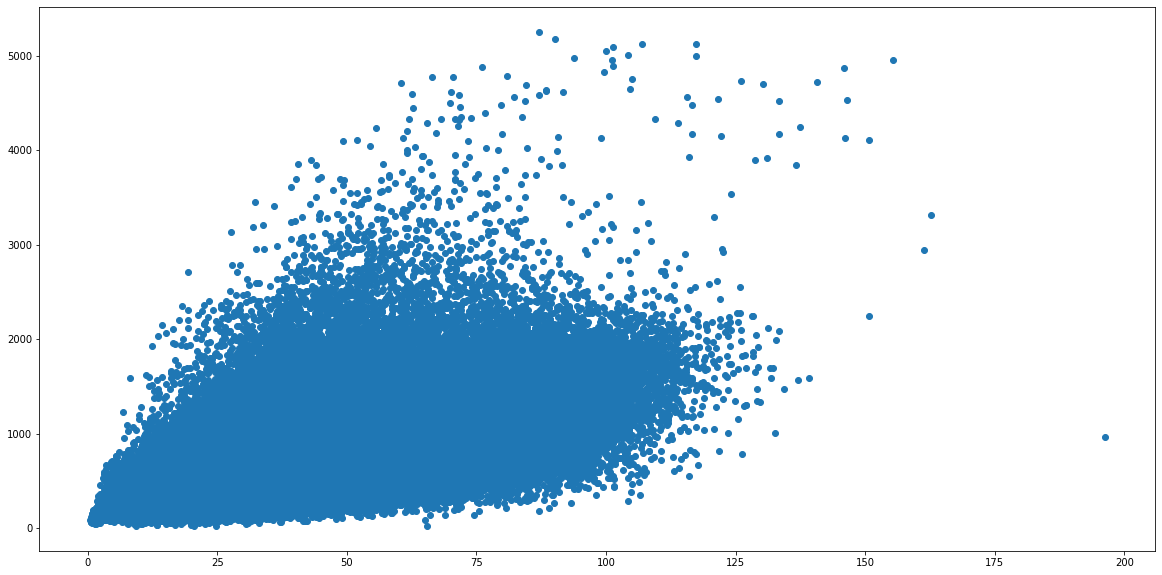

In [52]:
plt.scatter(bglr['tt_in_mins'],bglr['standard_deviation_travel_time'])

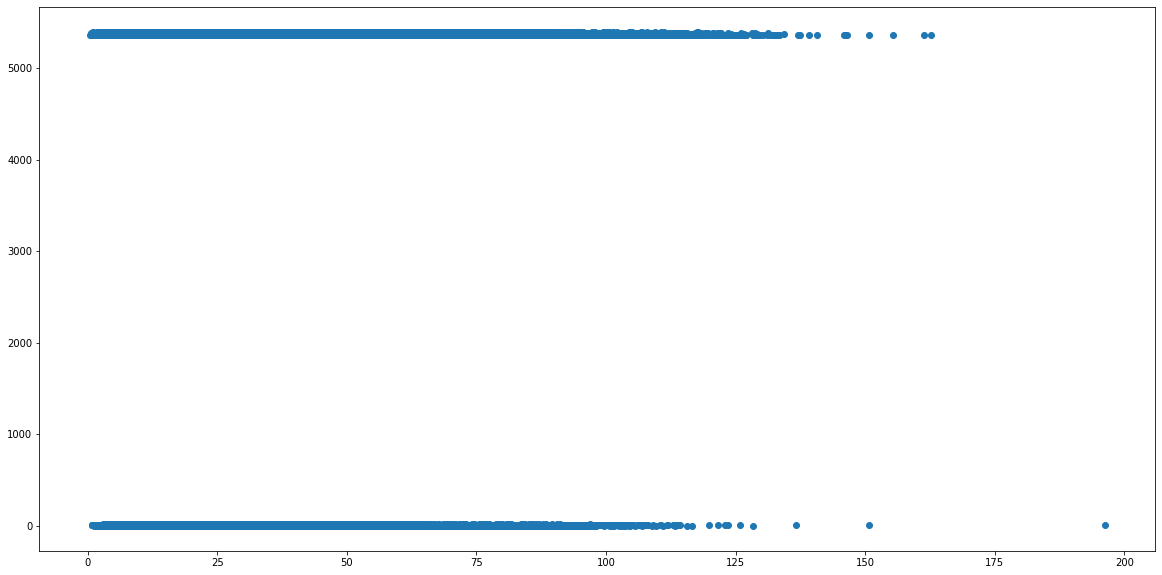

In [53]:
plt.scatter(bglr['tt_in_mins'],bglr['DISTANCE2'])

In [54]:
y = bglr['tt_in_mins']

In [68]:
bglr.drop('tt_in_mins', axis=1 ,inplace = True)

In [95]:
x=bglr

In [96]:
x

,DISTANCE2,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,stand_tt,st_geo_tt
0,1.126059,665.53,1944.10,1.31,11.092167,0.021833
1,1.089601,680.03,3095.19,1.22,11.333833,0.020333
2,0.639010,581.21,3900.20,1.16,9.686833,0.019333
3,1.548969,615.47,3143.88,1.19,10.257833,0.019833
4,12.928686,324.42,766.42,1.31,5.407000,0.021833
...,...,...,...,...,...,...
851958,5360.754510,652.37,4488.16,1.15,10.872833,0.019167
851959,5359.285293,693.47,1204.12,1.66,11.557833,0.027667
851960,5359.784850,558.44,2743.98,1.20,9.307333,0.020000
851961,5359.811147,474.52,2684.04,1.18,7.908667,0.019667


In [80]:
y

0         33.703667
1         52.653500
2         65.722333
3         53.227333
4         13.350833
            ...    
851958    75.538833
851959    22.833333
851960    46.552500
851961    45.361000
851962    49.097333
Name: tt_in_mins, Length: 851963, dtype: float64

In [97]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)

In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=10,random_state=0)

In [140]:
type(y_train)

pandas.core.series.Series

In [141]:
x_train, y_train, y_test = np.array(x_train), np.array(y_train) ,np.array(y_test)

In [142]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
y_pred=reg.predict(x_test)

In [144]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [145]:
score

0.9903554223169252

In [146]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.9471022786384896

33858.10123270587